<a href="https://colab.research.google.com/github/Akanksha-Mathure/Heart_Disease_Prediction_ML_Project/blob/main/ML_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
import io


In [ ]:
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
heart=next(iter(uploaded))
df=pd.read_csv(io.BytesIO(uploaded[heart]))

In [ ]:
print("Dataset Shape:", df.shape)


Dataset Shape: (303, 14)


In [ ]:
print("\nFirst 5 Rows:\n", df.head())



First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

log_acc = accuracy_score(y_test, y_pred_log)
print(f"\nLogistic Regression Accuracy: {log_acc*100:.2f}%")


Logistic Regression Accuracy: 85.25%


In [ ]:
# Random Forest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Best model after tuning
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"\nTuned Random Forest Accuracy: {rf_acc*100:.2f}%")
print("Best Parameters:", grid_search.best_params_)


Tuned Random Forest Accuracy: 85.25%
Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


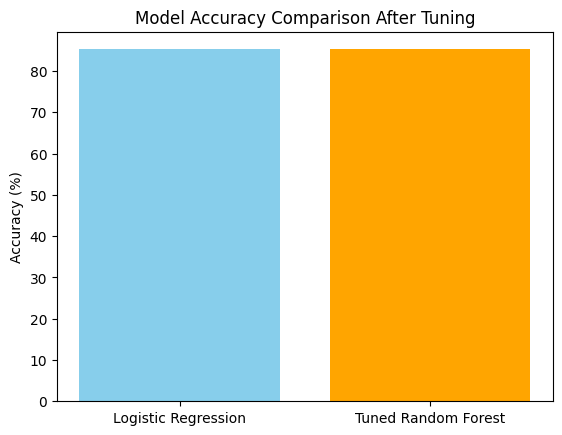

In [ ]:
# Compare Models
models = ['Logistic Regression', 'Tuned Random Forest']
accuracies = [log_acc*100, rf_acc*100]

plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.title('Model Accuracy Comparison After Tuning')
plt.ylabel('Accuracy (%)')
plt.show()

In [ ]:
print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf))



Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
better_model = models[np.argmax(accuracies)]
print(f"\n The better performing model is: {better_model}")


 The better performing model is: Logistic Regression


In [ ]:
# --- Model 2: K-Nearest Neighbors (KNN) ---
# KNN is a non-linear, instance-based model. We use k=7 as a default setting.
from sklearn.neighbors import KNeighborsClassifier

k = 7
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)



In [ ]:
from sklearn.metrics import accuracy_score

log_accuracy = accuracy_score(y_test, y_pred_log)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"KNN (k={k}) Accuracy: {knn_accuracy:.4f}")

Logistic Regression Accuracy: 0.8525
KNN (k=7) Accuracy: 0.9180


In [ ]:
if log_accuracy > knn_accuracy:
    print('Logistic Regression showed higher accuracy.')
elif knn_accuracy > log_accuracy:
    print(f'KNN with k={k} showed higher accuracy.')
else:
    print('Both models showed the same accuracy.')

KNN with k=7 showed higher accuracy.


/tmp/ipython-input-523678024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


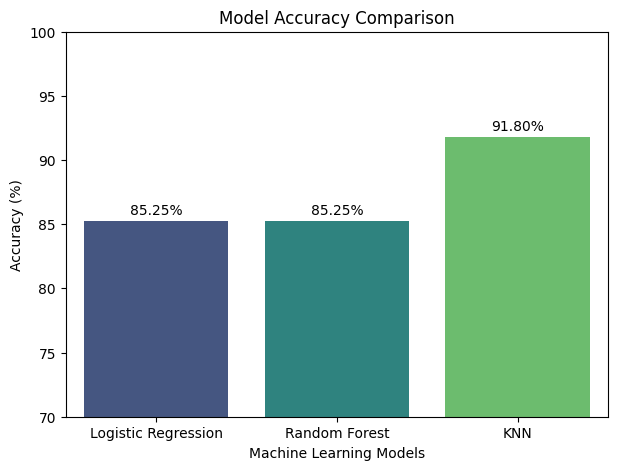

In [ ]:
# Compare models visually
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [log_acc*100, rf_acc*100, knn_accuracy*100]

plt.figure(figsize=(7,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Machine Learning Models')
plt.ylim(70, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f'{acc:.2f}%', ha='center', fontsize=10)
plt.show()

In [ ]:
# Show which model performed best
best_model = models[np.argmax(accuracies)]
print(f"\n The best performing model is: {best_model}")


 The best performing model is: KNN
